<a href="https://colab.research.google.com/github/Nuwanthapasindu/paddy-disease-prediction-ai-model/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
from tensorflow.keras import models, layers
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!unzip "/content/drive/MyDrive/ML_Learning/paddy-disease-prediction-ai-model/archive.zip"

Streaming output truncated to the last 5000 lines.
  inflating: paddy-disease-classification/train_images/hispa/104947.jpg  
  inflating: paddy-disease-classification/train_images/hispa/104955.jpg  
  inflating: paddy-disease-classification/train_images/hispa/104959.jpg  
  inflating: paddy-disease-classification/train_images/hispa/104960.jpg  
  inflating: paddy-disease-classification/train_images/hispa/104967.jpg  
  inflating: paddy-disease-classification/train_images/hispa/104969.jpg  
  inflating: paddy-disease-classification/train_images/hispa/104973.jpg  
  inflating: paddy-disease-classification/train_images/hispa/104976.jpg  
  inflating: paddy-disease-classification/train_images/hispa/104979.jpg  
  inflating: paddy-disease-classification/train_images/hispa/104981.jpg  
  inflating: paddy-disease-classification/train_images/hispa/104985.jpg  
  inflating: paddy-disease-classification/train_images/hispa/104986.jpg  
  inflating: paddy-disease-classification/train_images/hispa/

In [9]:
data_set_path = "/content/paddy-disease-classification"
data_set_train_path = os.path.join(data_set_path, "train_images")
data_set_test_path = os.path.join(data_set_path, "test_images")

In [13]:
IMAGE_SIZE = 480
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [15]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_set_train_path,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 19131 files belonging to 10 classes.


In [23]:
class_names = dataset.class_names
class_names

['bacterial_leaf_blight',
 'bacterial_leaf_streak',
 'bacterial_panicle_blight',
 'blast',
 'brown_spot',
 'dead_heart',
 'downy_mildew',
 'hispa',
 'normal',
 'tungro']

In [17]:
class_counts = {}
for class_name in class_names:
    class_dir = os.path.join(data_set_train_path, class_name)
    class_counts[class_name] = len(os.listdir(class_dir))

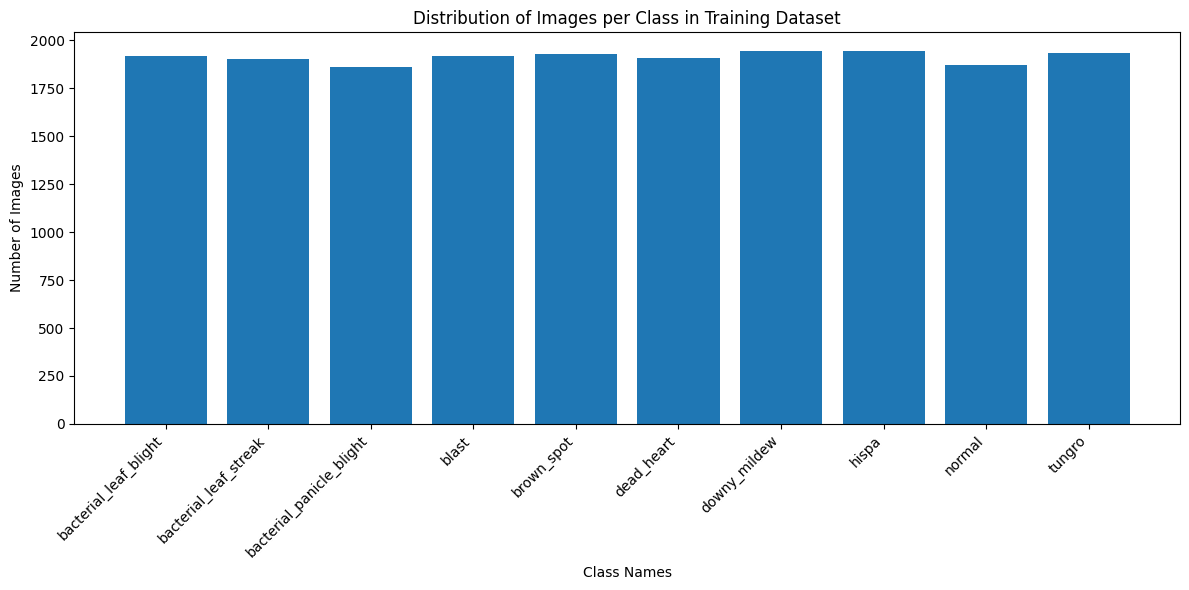

In [21]:
plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=45, ha='right')
plt.xlabel("Class Names")
plt.ylabel("Number of Images")
plt.title("Distribution of Images per Class in Training Dataset")
plt.tight_layout()
plt.show()

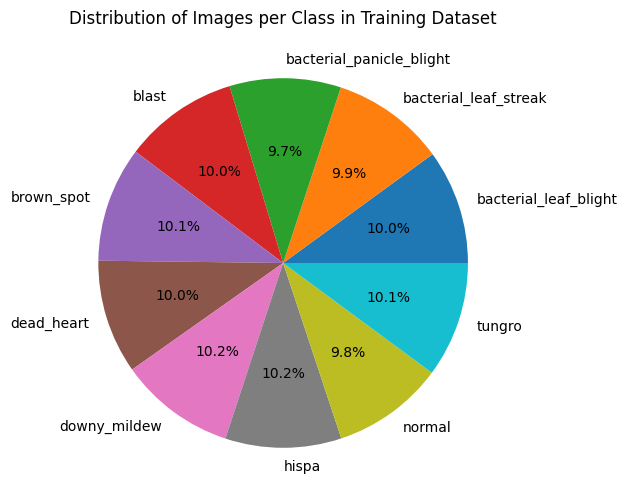

In [22]:
plt.figure(figsize=(12, 6))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%')
plt.title("Distribution of Images per Class in Training Dataset")
plt.show()